### Demark Methods

전일 음선인 경우

$$\frac{H_t + 2 \cdot L_t + C_t}{4}$$

전일 양선인 경우

$$\frac{2 \cdot H_t + L_t + C_t}{4}$$

전일 도지인 경우

$$\frac{H_t + L_t + 2 \cdot C_t}{4}$$

목표고가 : 기준가격 $\times$ 2 - 전일저가

목표저가 : 기준가격 $\times$ 2 - 전일고가

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [8]:
start_date = '2010-01-01'
end_date = '2024-03-14'
ticker = 'AAPL'

data = yf.download(
    ticker, start = start_date, end = end_date
)

[*********************100%%**********************]  1 of 1 completed


In [9]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409364,447610800
...,...,...,...,...,...,...
2024-03-07,169.149994,170.729996,168.490005,169.000000,169.000000,71765100
2024-03-08,169.000000,173.699997,168.940002,170.729996,170.729996,76114600
2024-03-11,172.940002,174.380005,172.050003,172.750000,172.750000,60139500


In [10]:
def demark_indicators(df):
    # 기준 가격 계산
    df['base_price'] = 0.0

    # 전일 음선
    bearish = df['Close'].shift(1) > df['Open'].shift(1)
    df.loc[bearish, 'base_price'] = (df['High'] + 2*df['Low'] + df['Close']) / 4

    # 전일 양선
    bullish = df['Close'].shift(1) < df['Open'].shift(1)
    df.loc[bullish, 'base_price'] = (2*df['High'] + df['Low'] + df['Close']) / 4

    # 전일 도지 (시가 대비 종가의 변동이 1% 이내인 경우)
    doji_threshold = 0.01  # 도지로 간주하는 최대 변동 비율
    doji = (df['Close'].shift(1) / df['Open'].shift(1) - 1).abs() <= doji_threshold
    df.loc[doji, 'base_price'] = (df['High'] + df['Low'] + 2*df['Close']) / 4

    # 상단 하단 베리어 지정
    df['target_high'] = df['base_price']*2 - df['Low'].shift(1)
    df['target_low'] = df['base_price']*2 - df['High'].shift(1)
    
    return df

In [11]:
demark = demark_indicators(data)

In [12]:
demark

,Open,High,Low,Close,Adj Close,Volume,base_price,target_high,target_low
Date,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600,0.000000,NaN,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800,7.657143,7.729286,7.653572
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000,7.570715,7.525358,7.441786
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200,7.532411,7.538035,7.378035
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409364,447610800,7.544822,7.623572,7.518214
...,...,...,...,...,...,...,...,...,...
2024-03-07,169.149994,170.729996,168.490005,169.000000,169.000000,71765100,169.737499,170.795006,168.234993
2024-03-08,169.000000,173.699997,168.940002,170.729996,170.729996,76114600,171.024998,173.559990,171.320000
2024-03-11,172.940002,174.380005,172.050003,172.750000,172.750000,60139500,172.807503,176.675003,171.915009


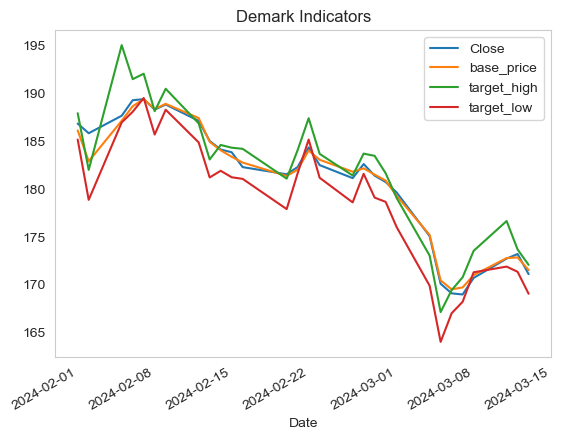

In [54]:
demark[['Close','base_price','target_high','target_low']]['2024-02':].plot(
    grid = False,
    title = 'Demark Indicators'
)
plt.show()

In [14]:
demark['label'] = 0

demark.loc[demark['Close'] > demark['target_high'], 'label'] = -1
demark.loc[demark['Close'] < demark['target_low'], 'label'] = 1

In [15]:
demark

,Open,High,Low,Close,Adj Close,Volume,base_price,target_high,target_low,label
Date,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600,0.000000,NaN,NaN,0
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800,7.657143,7.729286,7.653572,0
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000,7.570715,7.525358,7.441786,-1
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200,7.532411,7.538035,7.378035,0
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409364,447610800,7.544822,7.623572,7.518214,0
...,...,...,...,...,...,...,...,...,...,...
2024-03-07,169.149994,170.729996,168.490005,169.000000,169.000000,71765100,169.737499,170.795006,168.234993,0
2024-03-08,169.000000,173.699997,168.940002,170.729996,170.729996,76114600,171.024998,173.559990,171.320000,1
2024-03-11,172.940002,174.380005,172.050003,172.750000,172.750000,60139500,172.807503,176.675003,171.915009,0


In [16]:
demark['label'].value_counts()

label
 0    2165
 1     800
-1     607
Name: count, dtype: int64

### Feature Engineering

In [17]:
demark['return'] = demark['Close'].pct_change()

In [18]:
demark['rolling_mean'] = demark['return'].rolling(window = 21).mean()
demark['rolling_std'] = demark['return'].rolling(window = 21).std()
demark['rolling_skew'] = demark['return'].rolling(window = 21).skew()
demark['rolling_kurt'] = demark['return'].rolling(window = 21).kurt()

In [19]:
from ta.volatility import BollingerBands
from ta.volume import money_flow_index, on_balance_volume
from ta.momentum import rsi
from ta.volume import volume_weighted_average_price
from ta.momentum import tsi
from ta.volume import ease_of_movement
from ta.volume import volume_price_trend

demark['mfi'] = money_flow_index(
    high = demark.High, low = demark.Low, 
    close = demark.Close, volume = demark.Volume, window = 20
)
demark['obv'] = on_balance_volume(close = demark.Close, volume = demark.Volume)
demark['rsi'] = rsi(close = demark.Close, window = 21)
demark['vwap'] = volume_weighted_average_price(
    high = demark['High'], low = demark['Low'],
    close = demark['Close'], volume = demark['Volume'], window = 20)
demark['tsi'] = tsi(close = demark['Close'], window_fast = 13, window_slow = 15)
demark['eom'] = ease_of_movement(
    high = demark['High'], low = demark.Low, volume = demark.Volume, window = 20
)
demark['vpt'] = volume_price_trend(
    close = demark.Close,
    volume = demark.Volume
)

In [20]:
from FinancialMachineLearning.features.microstructure import *
spread = CorwinSchultz(high = demark.High, low = demark.Low)
cs_estimator = spread.corwin_schultz_estimator(window = 20)
demark['corwin_schultz'] = cs_estimator

In [21]:
from FinancialMachineLearning.features.volatility import *

demark['yang_zhang'] = yang_zhang_volatility(demark, window = 20)

In [22]:
demark

,Open,High,Low,Close,Adj Close,Volume,base_price,target_high,target_low,label,...,rolling_kurt,mfi,obv,rsi,vwap,tsi,eom,vpt,corwin_schultz,yang_zhang
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600,0.000000,NaN,NaN,0,...,NaN,NaN,493729600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800,7.657143,7.729286,7.653572,0,...,NaN,NaN,1095634400,NaN,NaN,NaN,0.000486,1.040652e+06,NaN,NaN
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000,7.570715,7.525358,7.441786,-1,...,NaN,NaN,543474400,NaN,NaN,NaN,-0.001480,-7.742184e+06,NaN,NaN
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200,7.532411,7.538035,7.378035,0,...,NaN,NaN,66343200,NaN,NaN,NaN,-0.001944,-8.624261e+06,NaN,NaN
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409364,447610800,7.544822,7.623572,7.518214,0,...,NaN,NaN,513954000,NaN,NaN,NaN,0.000004,-5.648397e+06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-07,169.149994,170.729996,168.490005,169.000000,169.000000,71765100,169.737499,170.795006,168.234993,0,...,1.758980,16.234365,16192308800,28.646200,179.996362,-49.571881,-1.092443,2.334173e+08,0.013099,0.012461
2024-03-08,169.000000,173.699997,168.940002,170.729996,170.729996,76114600,171.024998,173.559990,171.320000,1,...,1.257258,21.650816,16268423400,32.219578,179.182697,-49.897417,10.693857,2.341965e+08,0.000000,0.013195
2024-03-11,172.940002,174.380005,172.050003,172.750000,172.750000,60139500,172.807503,176.675003,171.915009,0,...,0.790721,22.299861,16328562900,36.140464,178.544721,-46.846544,7.341869,2.349080e+08,0.000000,0.013655


In [23]:
demark['meta_label'] = 0
demark.loc[(demark['label'] == 1) | (demark['label'] == -1), 'meta_label'] = 1
demark.head()

,Open,High,Low,Close,Adj Close,Volume,base_price,target_high,target_low,label,...,mfi,obv,rsi,vwap,tsi,eom,vpt,corwin_schultz,yang_zhang,meta_label
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600,0.000000,NaN,NaN,0,...,NaN,493729600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800,7.657143,7.729286,7.653572,0,...,NaN,1095634400,NaN,NaN,NaN,0.000486,1.040652e+06,NaN,NaN,0
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378824,552160000,7.570715,7.525358,7.441786,-1,...,NaN,543474400,NaN,NaN,NaN,-0.001480,-7.742184e+06,NaN,NaN,1
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200,7.532411,7.538035,7.378035,0,...,NaN,66343200,NaN,NaN,NaN,-0.001944,-8.624261e+06,NaN,NaN,0
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409364,447610800,7.544822,7.623572,7.518214,0,...,NaN,513954000,NaN,NaN,NaN,0.000004,-5.648397e+06,NaN,NaN,0


In [24]:
demark.dropna(inplace = True)

In [25]:
demark

,Open,High,Low,Close,Adj Close,Volume,base_price,target_high,target_low,label,...,mfi,obv,rsi,vwap,tsi,eom,vpt,corwin_schultz,yang_zhang,meta_label
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-02,7.497500,7.529643,7.419286,7.458929,6.314724,566546400,7.456786,7.576072,7.431429,0,...,73.717845,3812060000,55.174478,7.120996,10.372297,0.001259,-2.086894e+07,0.012317,0.014549,0
2010-03-03,7.462143,7.495357,7.426429,7.476071,6.329238,372052800,7.468482,7.517678,7.407321,0,...,69.411318,4184112800,55.624172,7.142548,13.702601,-0.000251,-2.001390e+07,0.038065,0.014332,0
2010-03-04,7.474286,7.532857,7.451071,7.525357,6.370964,366041200,7.508660,7.590892,7.521964,0,...,68.762902,4550154000,56.928646,7.159283,17.211422,0.000694,-1.760078e+07,0.037595,0.013813,0
2010-03-05,7.676429,7.846429,7.665357,7.819643,6.620105,899620400,7.787768,8.124465,8.042679,1,...,76.250005,5449774400,63.631382,7.227516,24.654039,0.005312,1.757974e+07,0.000000,0.013626,1
2010-03-08,7.857500,7.860357,7.794643,7.824286,6.624037,429889600,7.818482,7.971607,7.790535,0,...,75.447444,5879664000,63.724898,7.276941,30.250744,0.001095,1.783499e+07,0.005566,0.013169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-07,169.149994,170.729996,168.490005,169.000000,169.000000,71765100,169.737499,170.795006,168.234993,0,...,16.234365,16192308800,28.646200,179.996362,-49.571881,-1.092443,2.334173e+08,0.013099,0.012461,0
2024-03-08,169.000000,173.699997,168.940002,170.729996,170.729996,76114600,171.024998,173.559990,171.320000,1,...,21.650816,16268423400,32.219578,179.182697,-49.897417,10.693857,2.341965e+08,0.000000,0.013195,1
2024-03-11,172.940002,174.380005,172.050003,172.750000,172.750000,60139500,172.807503,176.675003,171.915009,0,...,22.299861,16328562900,36.140464,178.544721,-46.846544,7.341869,2.349080e+08,0.000000,0.013655,0


In [26]:
matrix = demark.drop(['Open','High','Low','Close','Volume','Adj Close'], axis = 1)
matrix.head()

,base_price,target_high,target_low,label,return,rolling_mean,rolling_std,rolling_skew,rolling_kurt,mfi,obv,rsi,vwap,tsi,eom,vpt,corwin_schultz,yang_zhang,meta_label
Date,,,,,,,,,,,,,,,,,,,
2010-03-02,7.456786,7.576072,7.431429,0,-0.000670,0.004094,0.014124,-1.173047,1.751486,73.717845,3812060000,55.174478,7.120996,10.372297,0.001259,-2.086894e+07,0.012317,0.014549,0
2010-03-03,7.468482,7.517678,7.407321,0,0.002298,0.003542,0.013947,-1.106173,1.780162,69.411318,4184112800,55.624172,7.142548,13.702601,-0.000251,-2.001390e+07,0.038065,0.014332,0
2010-03-04,7.508660,7.590892,7.521964,0,0.006592,0.003579,0.013955,-1.112991,1.783567,68.762902,4550154000,56.928646,7.159283,17.211422,0.000694,-1.760078e+07,0.037595,0.013813,0
2010-03-05,7.787768,8.124465,8.042679,1,0.039106,0.004622,0.015729,-0.396532,1.582326,76.250005,5449774400,63.631382,7.227516,24.654039,0.005312,1.757974e+07,0.000000,0.013626,1
2010-03-08,7.818482,7.971607,7.790535,0,0.000594,0.006367,0.012742,0.591180,0.761868,75.447444,5879664000,63.724898,7.276941,30.250744,0.001095,1.783499e+07,0.005566,0.013169,0


In [27]:
from sklearn.model_selection import train_test_split

X = matrix.drop(['meta_label','label'], axis = 1)
y = matrix['meta_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    criterion = 'entropy',
    class_weight = 'balanced_subsample',
    min_weight_fraction_leaf = 0.0,
    random_state = 42,
    n_estimators = 1000,
    max_features = 6,
    oob_score = True,
    n_jobs = 1
)

fit = forest.fit(X = X_train, y = y_train)
oob_score = fit.oob_score_

In [29]:
cont = pd.Series(X_train.index, index = X_train.index, name = 't1') # 포지션 보유 한도 임의 지정

In [30]:
from FinancialMachineLearning.feature_importance.importance import *
from FinancialMachineLearning.cross_validation.cross_validation import PurgedKFold, ml_cross_val_score
from sklearn.metrics import accuracy_score

cv_gen = PurgedKFold(n_splits = 5, samples_info_sets = cont)
oos_score = ml_cross_val_score(forest, X_train, y_train, cv_gen = cv_gen, scoring = accuracy_score).mean()
mdi = mean_decrease_impurity(fit, X_train.columns)

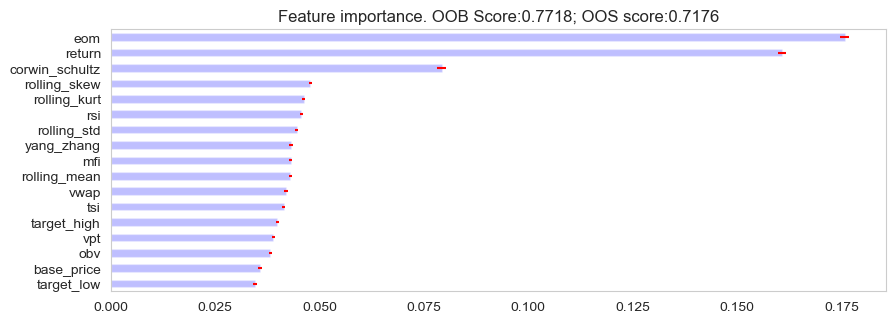

In [31]:
plot_feature_importance(
    mdi,
    oob_score = oob_score,
    oos_score = oos_score,
    save_fig = True,
    output_path = './AAPL_demark_MDI_feature_importance.png'
)
plt.grid(False)
plt.show()

In [32]:
from sklearn.metrics import log_loss

mda = mean_decrease_accuracy(fit, X_train, y_train, cv_gen, scoring = log_loss)

/Users/junghunlee/Desktop/Pycharm/FinancialMachineLearning/FinancialMachineLearning/feature_importance/importance.py:52: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  importance.replace([-np.inf, np.nan], 0, inplace=True)


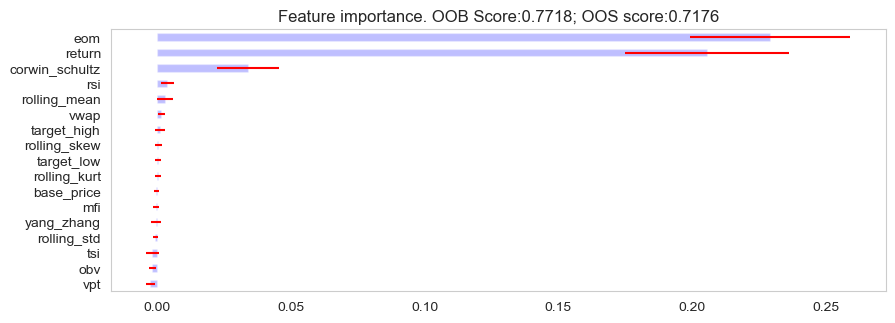

In [33]:
plot_feature_importance(
    mda,
    oob_score = oob_score,
    oos_score = oos_score,
    save_fig = True,
    output_path = './AAPL_demark_MDA_feature_importance.png'
)
plt.grid(False)
plt.show()

#### Result

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

y_prob = forest.predict_proba(X_test)[:, 1]
y_pred = forest.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7199434229137199


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       443
           1       0.63      0.60      0.62       264

    accuracy                           0.72       707
   macro avg       0.70      0.70      0.70       707
weighted avg       0.72      0.72      0.72       707


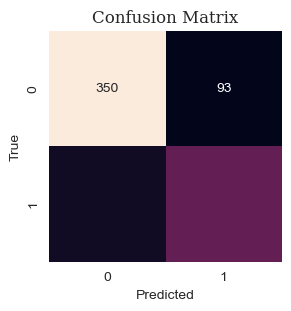

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

In [37]:
cm

array([[350,  93],
       [105, 159]])

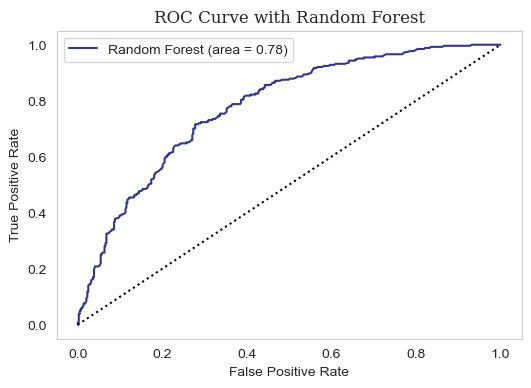

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Random Forest (area = {:.2f})'.format(roc_auc), color = 'navy', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Random Forest', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

#### Betting Size

In [39]:
from FinancialMachineLearning.bet_sizing.bet_sizing import *

In [40]:
event_prob = pd.DataFrame()
event_prob['t1'] = pd.Series(X_test.index, index = X_test.index, name = 't1')
event_prob['prob'] = fit.predict_proba(X_test)[:,1]
event_prob.index = pd.Series(X_test.index, index = X_test.index, name = 't1')

In [41]:
event_prob['side'] = matrix['label']

In [42]:
event_prob['bet_size_prob'] = de_prado_bet_size(prob_series = event_prob['prob'])

In [43]:
from multiprocessing import cpu_count

avg_active_bet_sizes = avg_active_signals(event_prob.rename(columns = {'bet_size_prob': 'signal'}), num_threads = cpu_count())
event_prob['avg_active_bet_size'] = avg_active_bet_sizes

2024-03-14 13:52:37.037498 100.0% mp_avg_active_signals done after 0.03 minutes. Remaining 0.0 minutes.


In [44]:
print("Summary statistics on the bet size columns:")
display(event_prob[['prob', 'bet_size_prob', 'avg_active_bet_size']].describe())

Summary statistics on the bet size columns:


,prob,bet_size_prob,avg_active_bet_size
count,707.000000,707.000000,707.0
mean,0.402149,0.211697,0.0
std,0.182073,0.286000,0.0
min,0.043000,0.000000,0.0
25%,0.244000,0.000000,0.0
50%,0.383000,0.000000,0.0
75%,0.567000,0.553781,0.0
max,0.798000,0.771026,0.0


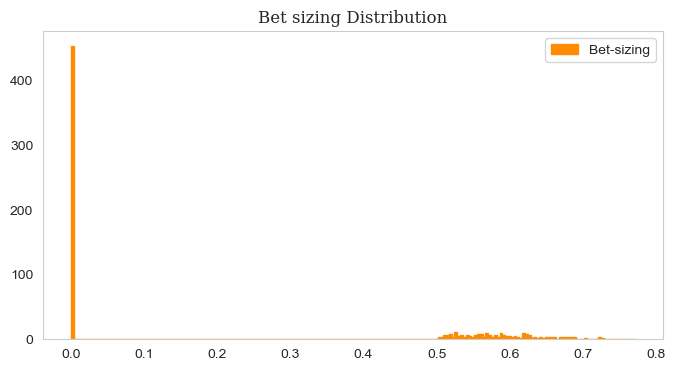

In [45]:
plt.figure(figsize = (8, 4))
plt.hist(
    event_prob.bet_size_prob, 
    bins = 200, 
    color = 'darkorange', 
    edgecolor = 'darkorange', 
    label = 'Bet-sizing'
)
plt.legend()
plt.grid(False)
plt.title('Bet sizing Distribution', fontsize = 12, fontfamily = 'Serif')
plt.show()

In [46]:
demark.loc[(event_prob['side'] == 1).index]['return']

t1
2021-05-21   -0.014767
2021-05-24    0.013314
2021-05-25   -0.001574
2021-05-26   -0.000394
2021-05-27   -0.012377
                ...   
2024-03-07   -0.000710
2024-03-08    0.010237
2024-03-11    0.011832
2024-03-12    0.002779
2024-03-13   -0.012123
Name: return, Length: 707, dtype: float64

In [51]:
demark.loc[(event_prob['side'] == 1).index]['return'].index

DatetimeIndex(['2021-05-21', '2021-05-24', '2021-05-25', '2021-05-26',
               '2021-05-27', '2021-05-28', '2021-06-01', '2021-06-02',
               '2021-06-03', '2021-06-04',
               ...
               '2024-02-29', '2024-03-01', '2024-03-04', '2024-03-05',
               '2024-03-06', '2024-03-07', '2024-03-08', '2024-03-11',
               '2024-03-12', '2024-03-13'],
              dtype='datetime64[ns]', name='t1', length=707, freq=None)


In [47]:
strategy = event_prob[event_prob['side'] == 1].bet_size_prob * demark.loc[event_prob.index]['return']

In [48]:
strategy

t1
2021-05-21    NaN
2021-05-24    NaN
2021-05-25    NaN
2021-05-26    NaN
2021-05-27    NaN
             ... 
2024-03-07    NaN
2024-03-08    0.0
2024-03-11    NaN
2024-03-12    NaN
2024-03-13    NaN
Length: 707, dtype: float64

In [52]:
strategy.index

DatetimeIndex(['2021-05-21', '2021-05-24', '2021-05-25', '2021-05-26',
               '2021-05-27', '2021-05-28', '2021-06-01', '2021-06-02',
               '2021-06-03', '2021-06-04',
               ...
               '2024-02-29', '2024-03-01', '2024-03-04', '2024-03-05',
               '2024-03-06', '2024-03-07', '2024-03-08', '2024-03-11',
               '2024-03-12', '2024-03-13'],
              dtype='datetime64[ns]', name='t1', length=707, freq=None)

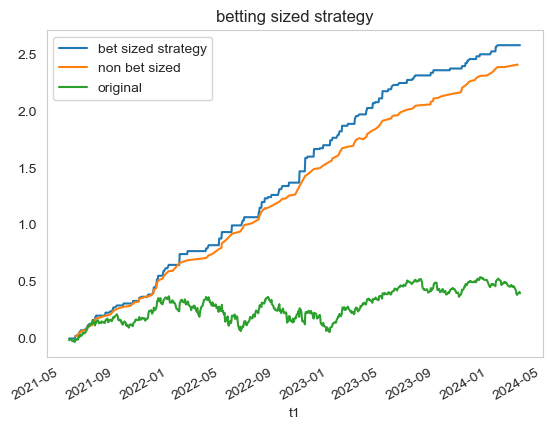

In [55]:
(strategy.fillna(0) * 2).cumsum().plot(label = 'bet sized strategy')
(demark.loc[(event_prob[event_prob['side'] == 1]).index]['return'].cumsum()).plot(label = 'non bet sized')
demark.loc[event_prob.index]['return'].cumsum().plot(label = 'original')
plt.legend()
plt.grid(False)
plt.title('betting sized strategy')
plt.show()